# EDA по данным всероссийского обследования домохозяйств по потребительским финансам

##### В датасете представлены данные по пятой волне (2022 год) Всероссийского обследования домохозяйств по потребительским финансам, опрос был проведен Банком России.

##### Данные взяты с сайта: https://cbr.ru/ec_research/vserossiyskoe-obsledovanie-domokhozyaystv-po-potrebitel-skim-finansam/

#### Цель анализа: исследовать уровень образования и его распределение по различным признакам

###  Гипотезы
- Уровень образования увеличивается с размером населенного пункта
- Уровень образования коррелирует с изменением уровня жизни за прошлый год
- Уровень образования растет с годом рождения
- Самый высокий уровень образования в Москве и Санкт-Петербурге


### Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('central_bank_dataset.xlsx', sheet_name = 0)

In [3]:
df.shape

(12162, 121)

In [4]:
df_main = df[['X', 'psu', 'gr_vozr', 'gr_educ', 'sett_typ','size', 'i_h4', 'i_h5', 'y11', 'y12', 'y13']]

df_main = df_main.rename(columns = { 'psu': 'region', 'gr_vozr': 'age_group', 'gr_educ' : 'education','sett_typ' :'loc_tp',
                         'i_h4': 'sex' ,'i_h5': 'birth_year', 'y11': 'lvl_life', 'y12': 'lvl_life_next','y13': 'certainty'})

In [5]:
df_main.head()

,X,region,age_group,education,loc_tp,size,sex,birth_year,lvl_life,lvl_life_next,certainty
0,1,Ленинградская область,46-55 лет,Среднее специальное,Город,от 10 тыс.чел. до 100 тыс.чел.,ЖЕНСКИЙ,1968,Ухудшилось,Останется без изменения,НЕТ ОТВЕТА
1,2,Ленинградская область,46-55 лет,Среднее общее и ниже,Город,от 10 тыс.чел. до 100 тыс.чел.,МУЖСКОЙ,1975,Ухудшилось,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2,3,Ленинградская область,26-35 лет,Среднее общее и ниже,Город,от 10 тыс.чел. до 100 тыс.чел.,МУЖСКОЙ,1990,Улучшилось,Скорее улучшится,Полностью уверены
3,4,Ленинградская область,18-25 лет,Среднее специальное,Город,от 10 тыс.чел. до 100 тыс.чел.,МУЖСКОЙ,1997,Осталось без изменения,Скорее улучшится,"Уверены, но не полностью"
4,5,Ленинградская область,56 лет и старше,Высшее и неполное высшее,Город,от 10 тыс.чел. до 100 тыс.чел.,ЖЕНСКИЙ,1957,Улучшилось,Останется без изменения,"Уверены, но не полностью"


In [6]:
df_main[df_main['education'] == 'ОТКАЗ ОТ ОТВЕТА']

,X,region,age_group,education,loc_tp,size,sex,birth_year,lvl_life,lvl_life_next,certainty
4606,4607,Республика Кабардино-Балкария,26-35 лет,ОТКАЗ ОТ ОТВЕТА,Село,сельские населенные пункты,МУЖСКОЙ,1992,Осталось без изменения,Останется без изменения,"Уверены, но не полностью"
4632,4633,Республика Кабардино-Балкария,18-25 лет,ОТКАЗ ОТ ОТВЕТА,Село,сельские населенные пункты,ЖЕНСКИЙ,1997,Осталось без изменения,Скорее улучшится,"Уверены, но не полностью"
7444,7445,Тульская область,36-45 лет,ОТКАЗ ОТ ОТВЕТА,Город,от 500 тыс.чел. до 1 млн.чел.,МУЖСКОЙ,1978,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ОТКАЗ ОТ ОТВЕТА,Не уверены


In [7]:
df_main[df_main['education'] == 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']

,X,region,age_group,education,loc_tp,size,sex,birth_year,lvl_life,lvl_life_next,certainty
4513,4514,Республика Кабардино-Балкария,46-55 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Село,сельские населенные пункты,ЖЕНСКИЙ,1972,Осталось без изменения,Останется без изменения,Полностью уверены
4609,4610,Республика Кабардино-Балкария,36-45 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Село,сельские населенные пункты,ЖЕНСКИЙ,1986,Осталось без изменения,Останется без изменения,Полностью уверены
4620,4621,Республика Кабардино-Балкария,26-35 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Село,сельские населенные пункты,МУЖСКОЙ,1989,Осталось без изменения,Останется без изменения,"Уверены, но не полностью"
4636,4637,Республика Кабардино-Балкария,26-35 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Село,сельские населенные пункты,ЖЕНСКИЙ,1992,Осталось без изменения,Останется без изменения,Полностью уверены
6865,6866,Пензенская область,26-35 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Село,сельские населенные пункты,ЖЕНСКИЙ,1989,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
7687,7688,Ростовская область,18-25 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Город,от 100 тыс.чел. до 500 тыс.чел.,МУЖСКОЙ,2001,Ухудшилось,Останется без изменения,"Уверены, но не полностью"
11643,11644,г. Санкт-Петербург,26-35 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Город,г.Санкт-Петербург,МУЖСКОЙ,1995,Осталось без изменения,Скорее улучшится,"Уверены, но не полностью"
11744,11745,Московская область,18-25 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Город,от 100 тыс.чел. до 500 тыс.чел.,МУЖСКОЙ,2003,Ухудшилось,Останется без изменения,Полностью уверены
12125,12126,Республика Коми,26-35 лет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Город,менее 10 тыс.чел.,МУЖСКОЙ,1992,Осталось без изменения,Скорее улучшится,Не уверены


In [8]:
df_main['education'] = df_main['education'].replace(['НЕТ ОТВЕТА', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
       'ОТКАЗ ОТ ОТВЕТА'], 'другое')

df_main['size'] = df_main['size'].replace({'от 10 тыс.чел. до 100 тыс.чел.' : '10k-100k', 'сельские населенные пункты': 'село',
                                          'от 500 тыс.чел. до 1 млн.чел.' : '500k-1kk', 'менее 10 тыс.чел.': '< 10k',
                                           'свыше 1 млн.чел. (кроме столиц)': '>1kk не столица' , 'от 100 тыс.чел. до 500 тыс.чел.': '100k-500k'}) 

In [9]:
df_main[df_main['lvl_life'] == 'ОТКАЗ ОТ ОТВЕТА']

,X,region,age_group,education,loc_tp,size,sex,birth_year,lvl_life,lvl_life_next,certainty
280,281,Краснодарский край,36-45 лет,Среднее специальное,Город,500k-1kk,МУЖСКОЙ,1986,ОТКАЗ ОТ ОТВЕТА,Останется без изменения,ОТКАЗ ОТ ОТВЕТА
348,349,Краснодарский край,56 лет и старше,Среднее специальное,Город,500k-1kk,ЖЕНСКИЙ,1962,ОТКАЗ ОТ ОТВЕТА,Останется без изменения,"Уверены, но не полностью"
2016,2017,Оренбургская область,56 лет и старше,Среднее специальное,Город,100k-500k,МУЖСКОЙ,1965,ОТКАЗ ОТ ОТВЕТА,ОТКАЗ ОТ ОТВЕТА,ОТКАЗ ОТ ОТВЕТА
2079,2080,Оренбургская область,56 лет и старше,Среднее общее и ниже,Город,100k-500k,ЖЕНСКИЙ,1949,ОТКАЗ ОТ ОТВЕТА,Останется без изменения,"Уверены, но не полностью"
2262,2263,Оренбургская область,46-55 лет,Высшее и неполное высшее,Город,100k-500k,ЖЕНСКИЙ,1968,ОТКАЗ ОТ ОТВЕТА,ОТКАЗ ОТ ОТВЕТА,ОТКАЗ ОТ ОТВЕТА
5504,5505,Амурская область,36-45 лет,Среднее общее и ниже,Село,село,МУЖСКОЙ,1983,ОТКАЗ ОТ ОТВЕТА,Останется без изменения,Полностью уверены
6797,6798,Пензенская область,46-55 лет,Высшее и неполное высшее,Город,10k-100k,МУЖСКОЙ,1974,ОТКАЗ ОТ ОТВЕТА,Скорее улучшится,"Уверены, но не полностью"


In [10]:
df_main[df_main['lvl_life'] == 'НЕТ ОТВЕТА']

,X,region,age_group,education,loc_tp,size,sex,birth_year,lvl_life,lvl_life_next,certainty
1709,1710,Республика Татарстан,56 лет и старше,Среднее общее и ниже,Город,>1kk не столица,ЖЕНСКИЙ,1953,НЕТ ОТВЕТА,Останется без изменения,"Уверены, но не полностью"
2516,2517,Ставропольский край,18-25 лет,Среднее общее и ниже,Город,10k-100k,ЖЕНСКИЙ,2003,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА
2518,2519,Ставропольский край,56 лет и старше,Среднее общее и ниже,Город,10k-100k,МУЖСКОЙ,1958,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА
3373,3374,Тверская область,26-35 лет,Высшее и неполное высшее,Село,село,ЖЕНСКИЙ,1991,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА
7400,7401,Смоленская область,26-35 лет,Высшее и неполное высшее,Город,100k-500k,МУЖСКОЙ,1987,НЕТ ОТВЕТА,Скорее улучшится,"Уверены, но не полностью"
8754,8755,г. Санкт-Петербург,26-35 лет,Высшее и неполное высшее,Город,г.Санкт-Петербург,ЖЕНСКИЙ,1992,НЕТ ОТВЕТА,Скорее ухудшится,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
8755,8756,г. Санкт-Петербург,26-35 лет,Среднее общее и ниже,Город,г.Санкт-Петербург,МУЖСКОЙ,1992,НЕТ ОТВЕТА,Скорее ухудшится,Не уверены
8977,8978,г. Санкт-Петербург,46-55 лет,Высшее и неполное высшее,Город,г.Санкт-Петербург,ЖЕНСКИЙ,1976,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА
10010,10011,Калужская область,56 лет и старше,другое,Село,село,ЖЕНСКИЙ,1953,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА
10466,10467,Саратовская область,26-35 лет,Высшее и неполное высшее,Город,500k-1kk,ЖЕНСКИЙ,1995,НЕТ ОТВЕТА,НЕТ ОТВЕТА,НЕТ ОТВЕТА


In [11]:
df_main['age'] = 2022 - df_main['birth_year'] 
df_main.groupby('age_group')[['age']].agg(['min', 'max', 'mean'])

age               
                min max       mean
age_group                         
18-25 лет        18  25  21.518551
26-35 лет        26  35  30.970466
36-45 лет        36  45  40.404265
46-55 лет        46  55  50.497204
56 лет и старше  56  97  67.520842

### Основная информация о датасете

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   X              12162 non-null  int64 
 1   region         12162 non-null  object
 2   age_group      12162 non-null  object
 3   education      12162 non-null  object
 4   loc_tp         12162 non-null  object
 5   size           12162 non-null  object
 6   sex            12162 non-null  object
 7   birth_year     12162 non-null  int64 
 8   lvl_life       12162 non-null  object
 9   lvl_life_next  12162 non-null  object
 10  certainty      12162 non-null  object
 11  age            12162 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [13]:
print(f"Дубликаты: {df_main.duplicated().sum()}")

Дубликаты: 0


In [14]:
df_main.describe()

,X,birth_year,age
count,12162.000000,12162.000000,12162.000000
mean,6081.500000,1972.479033,49.520967
std,3511.011322,17.348333,17.348333
min,1.000000,1925.000000,18.000000
25%,3041.250000,1959.000000,35.000000
50%,6081.500000,1973.000000,49.000000
75%,9121.750000,1987.000000,63.000000
max,12162.000000,2004.000000,97.000000


In [15]:
df_main.describe(include='object')

,region,age_group,education,loc_tp,size,sex,lvl_life,lvl_life_next,certainty
count,12162,12162,12162,12162,12162,12162,12162,12162,12162
unique,32,5,4,2,8,2,8,6,6
top,г. Москва,56 лет и старше,Среднее общее и ниже,Город,село,ЖЕНСКИЙ,Осталось без изменения,Останется без изменения,"Уверены, но не полностью"
freq,1098,4750,5584,8940,3126,7060,6033,6357,6806


## Исследование уровня образования

#### Распеделение уровня образования во всем датасете

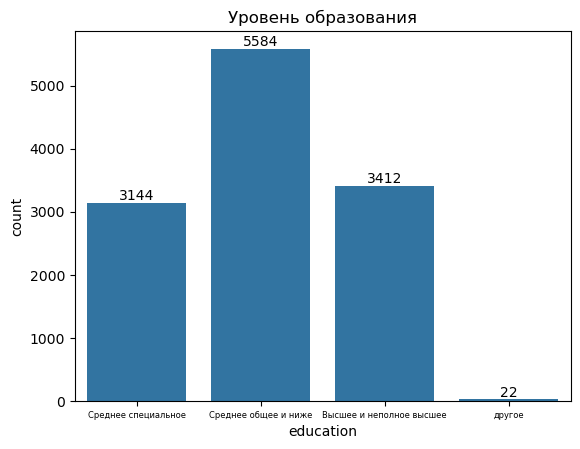

In [16]:
educ_count = sns.countplot(df_main, x='education')
educ_count.bar_label(educ_count.containers[0], fontsize=10);
educ_count.set_title("Уровень образования", fontsize=12)
plt.xticks(fontsize=6);

In [17]:
pd.DataFrame((df_main['education'].value_counts(normalize=True).rename('percent') * 100).round(2))

,percent
education,
Среднее общее и ниже,45.91
Высшее и неполное высшее,28.05
Среднее специальное,25.85
другое,0.18


##### Процент уровня образования для каждого пола

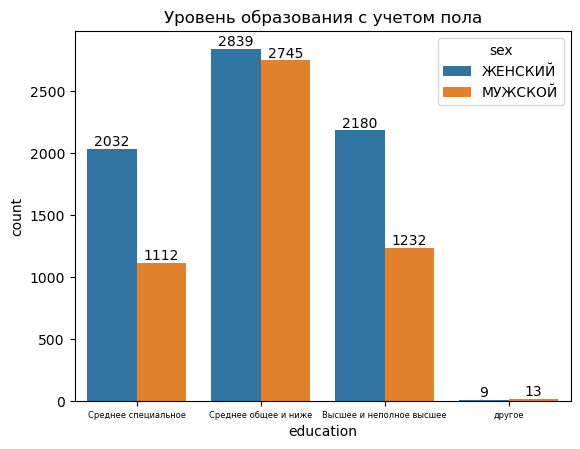

In [18]:
educ_sex = sns.countplot(df_main, x='education', hue = 'sex')
educ_sex.bar_label(educ_sex.containers[0], fontsize=10);
educ_sex.bar_label(educ_sex.containers[1], fontsize=10);
educ_sex.set_title("Уровень образования с учетом пола", fontsize=12)
plt.xticks(fontsize=6);

In [19]:
(df_main.groupby('sex')['education'].value_counts(normalize=True) * 100).round(2).unstack()

education,Высшее и неполное высшее,Среднее общее и ниже,Среднее специальное,другое
sex,,,,
ЖЕНСКИЙ,30.88,40.21,28.78,0.13
МУЖСКОЙ,24.15,53.80,21.80,0.25


#### Распределение уровня образования по размеру города

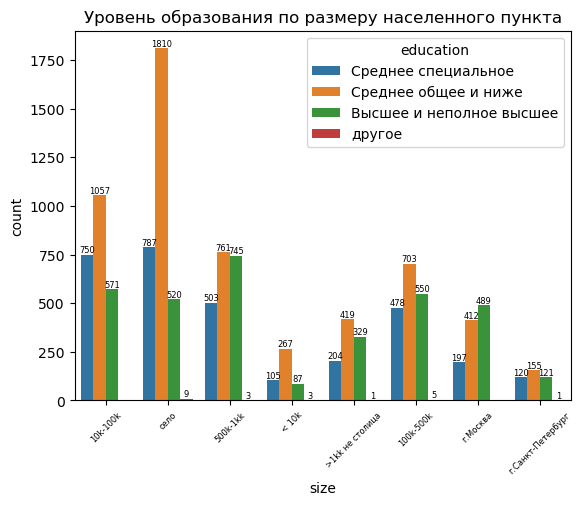

In [20]:
educ_city = sns.countplot(df_main, x='size', hue ='education')
educ_city.bar_label(educ_city.containers[0], fontsize=6);
educ_city.bar_label(educ_city.containers[1], fontsize=6);
educ_city.bar_label(educ_city.containers[2], fontsize=6);
educ_city.bar_label(educ_city.containers[3], fontsize=6);
educ_city.set_title("Уровень образования по размеру населенного пункта", fontsize=12)
plt.xticks(fontsize=6, rotation=45);

In [21]:
(df_main.groupby('size')['education'].value_counts(normalize=True) * 100).round(2).unstack() \
             .sort_values('Высшее и неполное высшее', ascending=False)

education,Высшее и неполное высшее,Среднее общее и ниже,Среднее специальное,другое
size,,,,
г.Москва,44.54,37.52,17.94,NaN
500k-1kk,37.03,37.82,25.00,0.15
>1kk не столица,34.52,43.97,21.41,0.10
100k-500k,31.68,40.50,27.53,0.29
г.Санкт-Петербург,30.48,39.04,30.23,0.25
10k-100k,24.01,44.45,31.54,NaN
< 10k,18.83,57.79,22.73,0.65
село,16.63,57.90,25.18,0.29


#### Распределение уровня образования по году рождения и возрастной группе

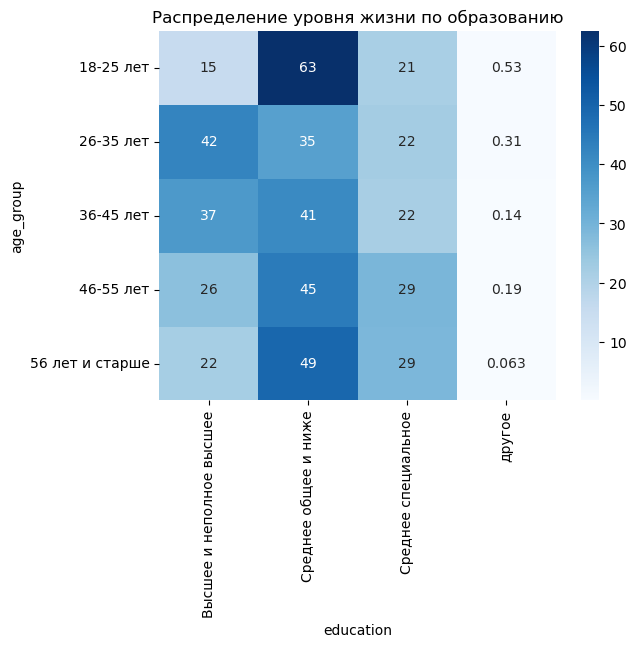

In [22]:
sns.heatmap(pd.crosstab( df_main['age_group'], df_main['education'], normalize='index')*100, annot=True, cmap='Blues')
plt.title('Распределение уровня жизни по образованию');

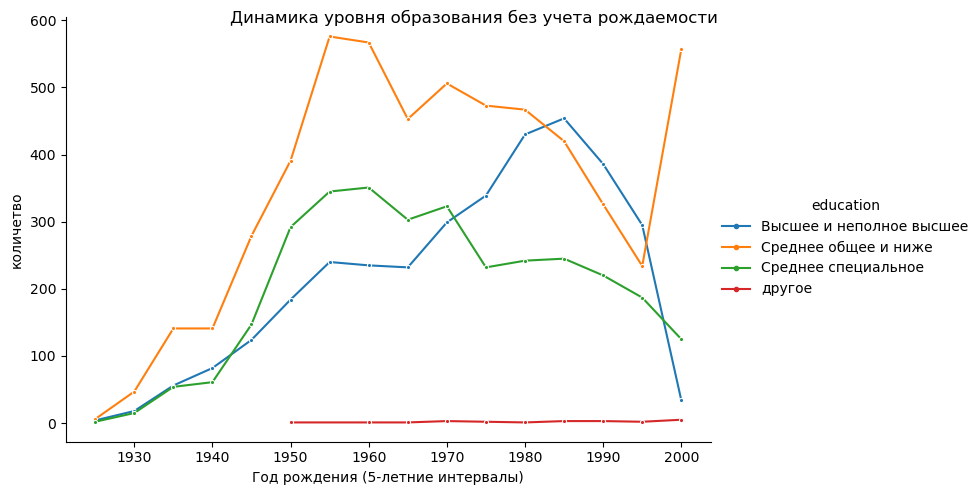

In [23]:
df_main['birth_year_5'] = df_main['birth_year'].apply(lambda year : year - (year % 5))
educ_period_lvl = df_main[['birth_year_5', 'education']].groupby(['birth_year_5', 'education']).size().reset_index(name='count')

educ_year_percent = sns.relplot( data = educ_period_lvl, x='birth_year_5', y='count', hue='education', kind='line',
                                 marker='.', height=5, aspect=1.5)
educ_year_percent.set_axis_labels('Год рождения (5-летние интервалы)', 'количетво');
educ_year_percent.fig.suptitle('Динамика уровня образования без учета рождаемости');


##### Странное поведение графика для 2000-х годов в том, что в него входят люди 18-22 лет и часть людей не успели получить высшее или среднее специальное образование, на следующем графике не будет учтен этот промежуток


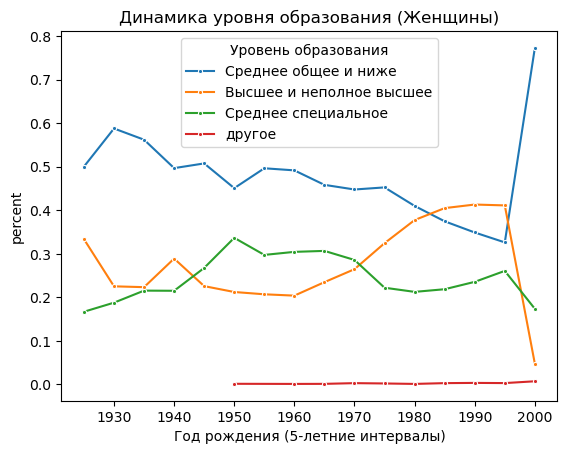

In [24]:
educ_period = df_main[['birth_year_5', 'education']] .groupby(['birth_year_5']).value_counts(normalize=True).reset_index(name='percent')

educ_line = sns.lineplot(data = educ_period, x = 'birth_year_5', y = 'percent', hue = 'education',  marker = '.')
educ_line.set_title('Динамика уровня образования (Женщины)')
educ_line.set_xlabel('Год рождения (5-летние интервалы)')
educ_line.legend(title='Уровень образования');


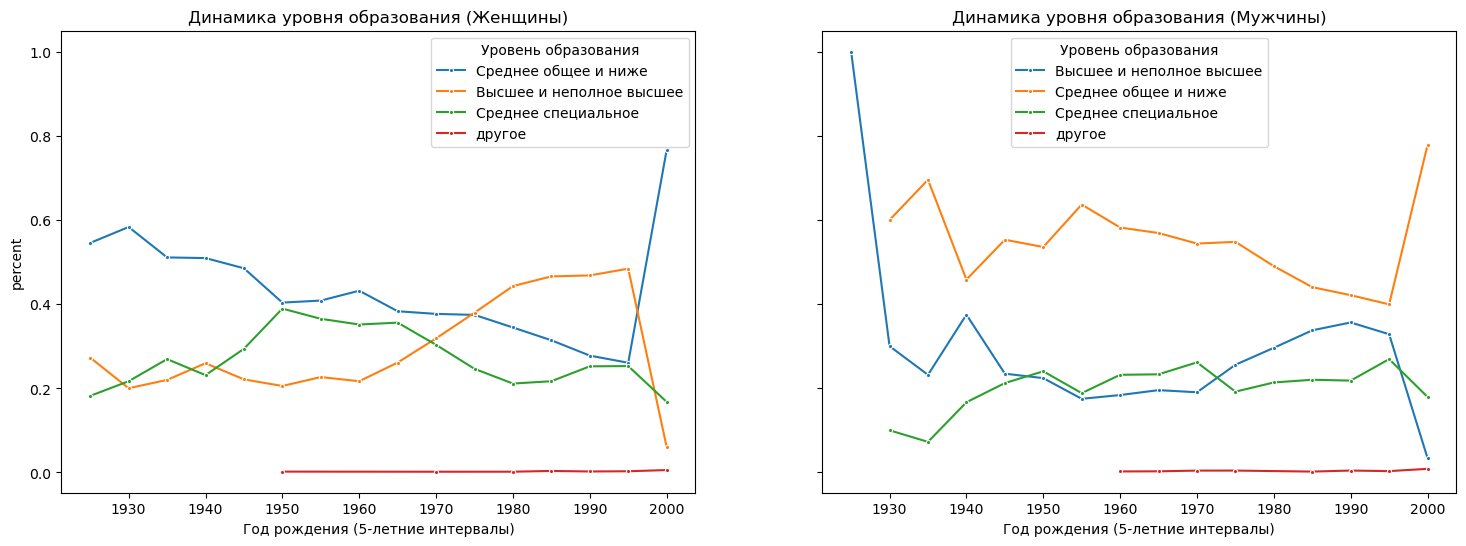

In [25]:
educ_period_w = df_main[['birth_year_5', 'education']][df_main['sex'] == 'ЖЕНСКИЙ']\
    .groupby(['birth_year_5']).value_counts(normalize=True).reset_index(name='percent')

educ_period_m = df_main[['birth_year_5', 'education']][df_main['sex'] == 'МУЖСКОЙ']\
    .groupby(['birth_year_5']).value_counts(normalize=True).reset_index(name='percent')


fig, (educ_w, educ_m) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.lineplot(data = educ_period_w, x = 'birth_year_5', y = 'percent', hue = 'education',  marker = '.', ax = educ_w)
educ_w.set_title('Динамика уровня образования (Женщины)')
educ_w.set_xlabel('Год рождения (5-летние интервалы)')
educ_w.legend(title='Уровень образования');

sns.lineplot(data = educ_period_m, x = 'birth_year_5', y = 'percent', hue = 'education', marker = '.', ax = educ_m)
educ_m.set_title('Динамика уровня образования (Мужчины)')
educ_m.set_xlabel('Год рождения (5-летние интервалы)')
educ_m.legend(title='Уровень образования');

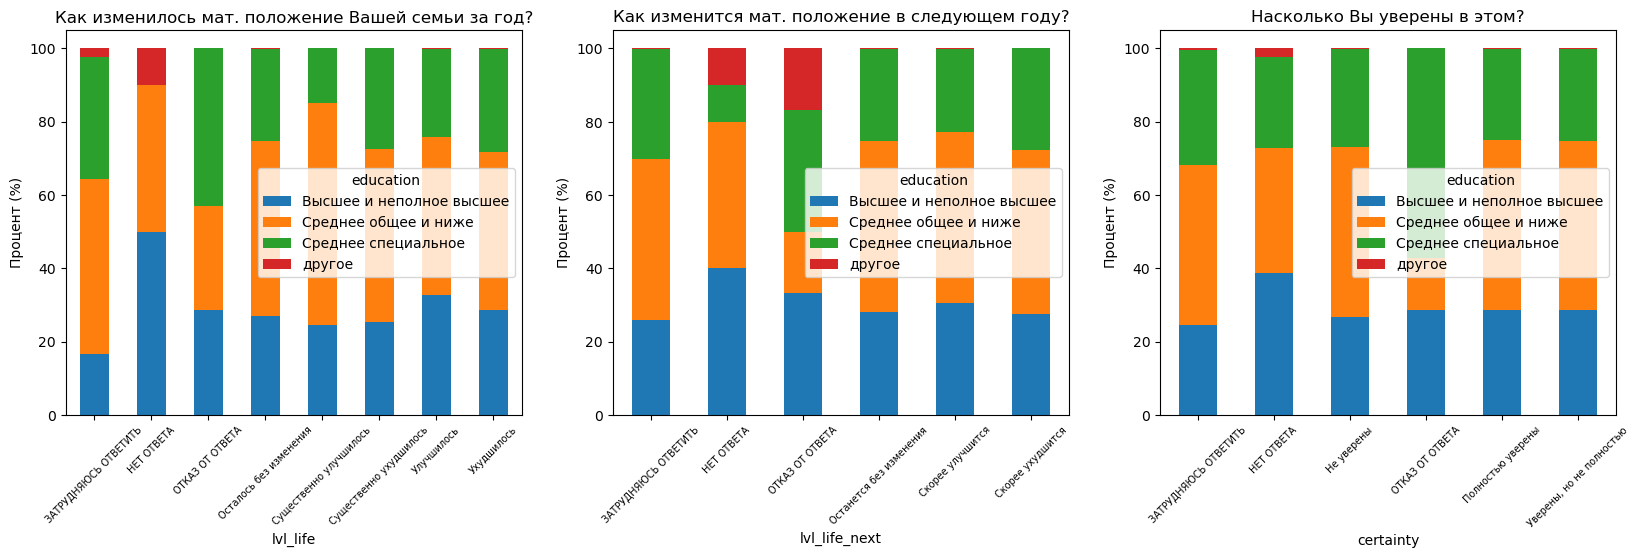

In [26]:
fin, (last_year_educ, next_year_educ, certainty_educ) = plt.subplots(1, 3 , figsize=(20, 5))

norm_cross = pd.crosstab(df_main['lvl_life'], df_main['education'], normalize='index')*100
norm_cross.plot(kind='bar', stacked=True, ax=last_year_educ)
last_year_educ.set_title('Как изменилось мат. положение Вашей семьи за год?')
last_year_educ.set_ylabel('Процент (%)')
last_year_educ.tick_params(axis='x', labelsize=7, rotation=45)

norm_cross = pd.crosstab(df_main['lvl_life_next'], df_main['education'], normalize='index')*100
norm_cross.plot(kind='bar', stacked=True, ax=next_year_educ)
next_year_educ.set_title('Как изменится мат. положение в следующем году?')
next_year_educ.set_ylabel('Процент (%)')
next_year_educ.tick_params(axis='x',labelsize=7, rotation=45)

norm_cross = pd.crosstab(df_main['certainty'], df_main['education'], normalize='index')*100
norm_cross.plot(kind='bar', stacked=True, ax=certainty_educ)
certainty_educ.set_title('Насколько Вы уверены в этом?')
certainty_educ.set_ylabel('Процент (%)')
certainty_educ.tick_params(axis='x',labelsize=7, rotation=45)


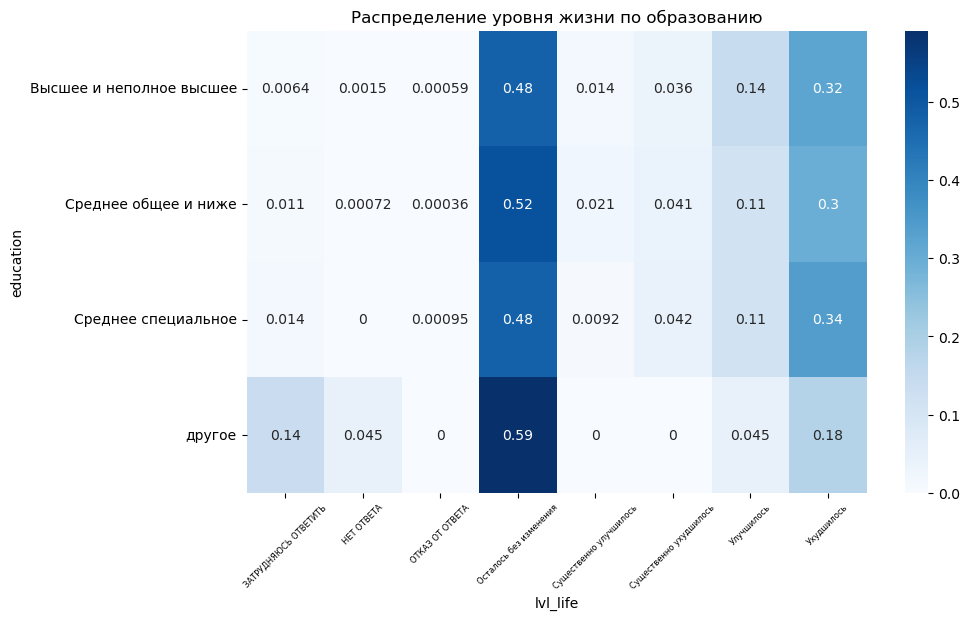

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df_main['education'], df_main['lvl_life'], normalize='index'), annot=True, cmap='Blues')
plt.title('Распределение уровня жизни по образованию');
plt.xticks(fontsize=6, rotation=45);

In [28]:
(df_main.groupby('lvl_life')['education'].value_counts(normalize=True) * 100).round(2).unstack()

education,Высшее и неполное высшее,Среднее общее и ниже,Среднее специальное,другое
lvl_life,,,,
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,16.67,47.73,33.33,2.27
НЕТ ОТВЕТА,50.00,40.00,NaN,10.00
ОТКАЗ ОТ ОТВЕТА,28.57,28.57,42.86,NaN
Осталось без изменения,27.12,47.69,24.98,0.22
Существенно улучшилось,24.62,60.51,14.87,NaN
Существенно ухудшилось,25.42,47.29,27.29,NaN
Улучшилось,32.79,43.02,24.12,0.07
Ухудшилось,28.55,43.30,28.05,0.10


In [29]:
(df_main.groupby('region')['education'].value_counts(normalize=True) * 100).round(2).unstack() \
.sort_values('Высшее и неполное высшее', ascending=False)

education,Высшее и неполное высшее,Среднее общее и ниже,Среднее специальное,другое
region,,,,
г. Москва,44.54,37.52,17.94,NaN
Смоленская область,40.67,32.06,27.27,NaN
Нижегородская область,38.90,38.90,21.92,0.27
Приморский край,37.65,42.28,19.75,0.31
Липецкая область,36.13,32.66,31.21,NaN
Московская область,33.89,37.42,28.52,0.17
Тульская область,33.33,45.33,20.67,0.67
Курганская область,33.01,44.98,21.53,0.48
Томская область,32.94,46.83,20.24,NaN


## Выводы
- Среди опрошенный, большинство имеют среднее общее образование или ниже
- Нет прямой зависимости между населением города и долей высшего образования среди проживающих
- Доля высшего образования растет, а общего среднего падает
- Нет сильно выраженной зависимости между уровнем образования и изменение уровня жизни в сравнении с годом ранее 